# **Project เรื่อง วิเคราะห์การเกิดอุบัติเหตุบนท้องถนน**

# **Computational Science Project (SC313101) : **

**สมาชิกในกลุ่ม (Team members):**

1) ชื่อ นายโภคิน  เมืองขำ         รหัสนักศึกษา 613020228-5

2) ชื่อ นายมีชัย  หนูพิศ             รหัสนักศึกษา 613020594-0

3) ชื่อ นายอรรถพงษ์ หลักคำ    รหัสนักศึกษา  613020605-1


**1.เปิดไฟล์ข้อมูลบน Colab**

  ทำการ upload file ขึ้น Colab ซึงใช้คำสั่ง ดังนี้
  
       from google.colab import files
  
       uploaded = files.upload()

  
   เลือก file ที่ต้องการ จากเครื่องคอมพิวเตอร์

In [ ]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving information.xlsx to information (1).xlsx
Saving thaiAcc.txt to thaiAcc.txt


**ข้อมูล สถิติการเกิดอุบติเหตุ ของประเทศไทย ในภาพรวม ปี 2559,2560,2560**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
year = []
dead =[]
Injury = []
number_of_accident_per_year = []
def openFile(fileName):
    file = open(fileName,"r")
    line = file.readlines()
    print("\t\t\tNumber of accidents in Thailand\n")
    print("\t\tYear    dead    injury    Accident\n")
    for i in line:
        number_of_accident_per_year.append(np.int_((i.split())[3]))
        year.append((i.split())[0])
        dead.append(np.int_((i.split())[1]))
        Injury.append(np.int_((i.split())[2]))
        print("\t"+i)
    return dead,Injury,number_of_accident_per_year,year

def plotFrist(openFile):
    plt.ylabel('Number of accident / year')
    plt.xlabel('Year')
    
    plt.ylim(700000,1200000)
    plt.plot(number_of_accident_per_year,'o')
    plt.plot(year,number_of_accident_per_year,'green')
    plt.show()


    n_groups = 3
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    rects1 = ax.bar(index, Injury, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Injured')
    rects2 = ax.bar(index + bar_width, dead, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Dead')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number / year')
    ax.set_title('Accident in 3 year')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(year)
    ax.legend()
    fig.tight_layout()
    plt.show()
    
while True:
  try:
    print('file name is >>>thaiAcc.txt<<')
    file_name = input('Input your file name : ')
    plotFrist(openFile(file_name))
    break
  except:
    print('###################################################')
    print('\nNot found'+file_name)
    print('Please try again')
    print('###################################################')
      
    


file name is >>>thaiAcc.txt<<
###################################################

Not foundๆ
Please try again
###################################################
file name is >>>thaiAcc.txt<<
###################################################

Not foundehaiAcc.txt
Please try again
###################################################
file name is >>>thaiAcc.txt<<
###################################################

Not foundthaiAcc.txt
Please try again
###################################################
file name is >>>thaiAcc.txt<<


**2.อ่านข้อมูลและนำข้อมูลมาวิเคราะห์ แสดงผล**

2.1 อ่านข้อมูลจาก file excel

2.2 นำข้อมูลที่อ่าน ไปจัดเก็บ ในรูปแบบ Data dict เพื่อให้ง่ายต่อการนำข้อมูลไปใช้งาน

2.3 นำข้อมูลมาวิเคราะห์ แสดงผล

 ซึ่งประกอบด้วย 3 ฟังก์ชันหลัก
 
    1.def openExcel1(fileName):  เป็นการอ่าน file excel  และนำข้อมูลไปจัดเก็บ ในรูปแบบ Data dict เพื่อให้ง่ายต่อการนำข้อมูลไปใช้งาน
    
    2.def ShowInformation(openExcel1,searchProvince):   เป็นฟังก์ชันที่สามารถ search ชื่อจังหวัดที่ต้องการ เพื่อนำข้อมูลของจังหวัดนั้น ไปวิเคราะห์และแสดงผล
    
    3.def PlotInformation(ShowInformation):   เป็นฟังก์ชันที่นำเอาข้อมูลของจังหวัด ที่ได้จาก ฟังก์ชัน ShowInformation  มาวิเคราะห์และแสดงผล



Input province to Analysis : นนทบุรี
	Statistics of accidents in the  นนทบุรี

Graph 1

Total accident in 3 year 
year     accident
2559  :  3496.0
2560  :  3974.0
2561  :  4486.0


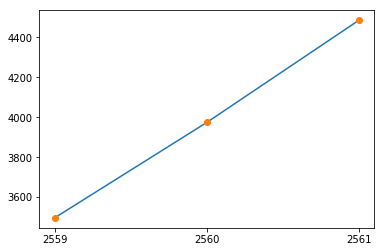

rate in  2559  to  2560  =  13.67 %
rate in  2560  to  2561  =  12.88 %





Graph 2

Accident in 3 year

year   Car     Bike
2559   79.0   3417.0
2560   91.0   3883.0
2561   89.0   4397.0


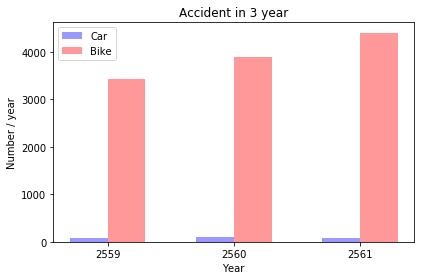






Graph 3

Car accident
Total car accident 3 year :  259.0
Dead :  31.0
Injured :  228.0


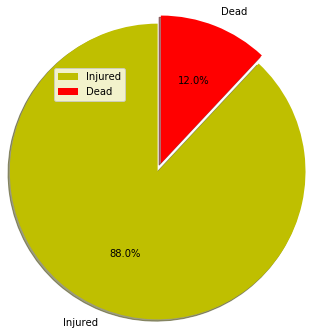






Graph 4

Bike accident
Total Bike accident 3 year :  11697.0
Dead :  486.0
Injured :  11211.0


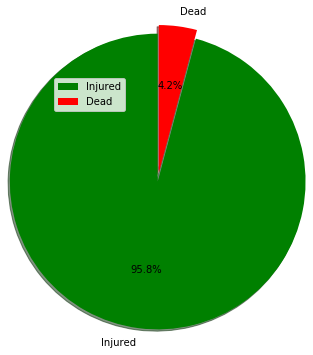

In [ ]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
province = []
population = []
numCar = []
numBike = []
accCar =[]
accBike = []
injuCar = []
deadCar =[]
injuBike = []
deadBike = []
dataDict ={}
def openExcel1(fileName):
    workbook = xlrd.open_workbook(fileName)
    sheet1 = workbook.sheet_by_name("Sheet1")
    sheet2 = workbook.sheet_by_name("Sheet2")
    sheet3 = workbook.sheet_by_name("Sheet3")
    sheet4 = workbook.sheet_by_name("Sheet4")
    sheet1.cell_value(0,0)
    sheet2.cell_value(0,0)
    sheet3.cell_value(0,0)
    sheet4.cell_value(0,0)

    j=1    
    while(j<(sheet1.nrows)):
            numCar.append((sheet1.cell_value(j,2)))
            numBike.append(sheet1.cell_value(j,3))
            population.append(sheet1.cell_value(j,1))
            accCar.append([sheet2.cell_value(j,1),sheet3.cell_value(j,1),sheet4.cell_value(j,1)])
            accBike.append([sheet2.cell_value(j,2),sheet3.cell_value(j,2),sheet4.cell_value(j,2)])
            injuCar.append([sheet2.cell_value(j,3),sheet3.cell_value(j,3),sheet4.cell_value(j,3)])
            injuBike.append([sheet2.cell_value(j,4),sheet3.cell_value(j,4),sheet4.cell_value(j,4)])
            deadCar.append([sheet2.cell_value(j,5),sheet3.cell_value(j,5),sheet4.cell_value(j,5)])
            deadBike.append([sheet2.cell_value(j,6),sheet3.cell_value(j,6),sheet4.cell_value(j,6)])
            dataDict.update({np.str_(sheet2.cell_value(j,0)):[population.pop(0),numCar.pop(0),numBike.pop(0),accCar.pop(0),accBike.pop(0),injuCar.pop(0),injuBike.pop(0),deadCar.pop(0),deadBike.pop(0)]})
            j=j+1   
    return dataDict

value_list = []
def ShowInformation(openExcel1,searchProvince):
    check = False
    for key,value in dataDict.items():
        if(searchProvince == key):
            return check == True,value_list.append(value),province.append(searchProvince)
    if(check==False):
        #print('Not found '+searchProvince+' in dataDict.')
        #print('search again!.')
        print('####################################')
    


def PlotInformation(ShowInformation):
    #set information
    # It's list in list
    population.append(value_list[0][0])
    numCar.append(value_list[0][1])
    numBike.append(value_list[0][2])
    accCar.append(value_list[0][3])
    accBike.append(value_list[0][4])
    injuCar.append(value_list[0][5])
    injuBike.append(value_list[0][6])
    deadCar.append(value_list[0][7])
    deadBike.append(value_list[0][8])
    year_list = ['2559','2560','2561']
    
    #province
    print('\tStatistics of accidents in the ',province[0]) 
    
    #graph 1
    print('\nGraph 1')
    print('\nTotal accident in 3 year ')
    print('year     accident')
    for x,y in zip(year_list,np.array(accCar[0])+np.array(accBike[0])):
        print(x,' : ',y)
  
    Total = np.array(accCar[0])+np.array(accBike[0])
    rate1 = ((Total[1]*100)/Total[0])-100
    rate2 = ((Total[2]*100)/Total[1])-100
    plt.plot(year_list,np.array(accCar[0])+np.array(accBike[0]))
    plt.plot(np.array(accCar[0])+np.array(accBike[0]),'o')
    plt.show()
    
    print('rate in ',year_list[0],' to ',year_list[1],' = ','%.2f'%rate1,'%')
    print('rate in ',year_list[1],' to ',year_list[2],' = ','%.2f'%rate2,'%')
   
    
    #graph 2
    print('\n\n\n\n\nGraph 2')
    print('\nAccident in 3 year\n')
    print('year   Car     Bike')
    for x,y,z in zip(year_list,accCar[0],accBike[0]):
        print(x," ",y," ",z)
    n_groups = 3
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    rects1 = ax.bar(index, np.array(accCar[0]), bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Car')
    rects2 = ax.bar(index + bar_width, np.array(accBike[0]), bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Bike')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number / year')
    ax.set_title('Accident in 3 year')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(year_list)
    ax.legend()
    fig.tight_layout()
    plt.show()
    
    #graph 3
    print('\n\n\n\n\nGraph 3')
    print('\nCar accident')
    print('Total car accident 3 year : ',sum(accCar[0]))
    print('Dead : ',sum(deadCar[0]))
    print('Injured : ',sum(injuCar[0]))
    # defining labels 
    activities = ['Injured','Dead'] 
    # portion covered by each label 
    slices = [sum(injuCar[0]),sum(deadCar[0])] 
    # color for each label 
    colors = ['y','r'] 
    # plotting the pie chart 
    plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0.1), 
        radius = 1.7, autopct = '%1.1f%%') 
    # plotting legend 
    plt.legend() 
    # showing the plot 
    plt.show() 
    
    #graph 4
    print('\n\n\n\n\nGraph 4')
    print('\nBike accident')
    print('Total Bike accident 3 year : ',sum(accBike[0]))
    print('Dead : ',sum(deadBike[0]))
    print('Injured : ',sum(injuBike[0]))
    # defining labels 
    activities = ['Injured','Dead'] 
    # portion covered by each label 
    slices = [sum(injuBike[0]),sum(deadBike[0])] 
    # color for each label 
    colors = ['g','r'] 
    # plotting the pie chart 
    plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0.1), 
        radius = 1.7, autopct = '%1.1f%%') 
    # plotting legend 
    plt.legend() 
    # showing the plot 
    plt.show() 
while True:
    try:
        Input_province = input("Input province to Analysis : ")
        PlotInformation(ShowInformation(openExcel1(r'information.xlsx'),Input_province))
        break
    except:
        print("\t\tNot found "+Input_province+" in dataDict or Misspelled.")
        print("\t\t\tPlease search again")
        print('####################################\n')
          
